In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dados = '/home/matheus/Documentos/books-scrap/data/db_books.sqlite3'

In [3]:
connect = sqlite3.connect(dados)

query = 'select * from books'

df = pd.read_sql_query(query, connect)

df.head()

,categoria,titulo,id,preco_sem_taxa,preco_real,taxa,estoque,reviews,estrelas
0,Philosophy,The Stranger,f5a92cff83897d48,£17.44,£17.44,£0.00,In stock (15 available),0,star-rating Four
1,Business,The Third Wave: An Entrepreneur’s Vision of th...,3bebf34ee9330cbd,£12.61,£12.61,£0.00,In stock (15 available),0,star-rating Five
2,Fiction,The Vacationers,fd3a622648667296,£42.15,£42.15,£0.00,In stock (15 available),0,star-rating Four
3,Childrens,The White Cat and the Monk: A Retelling of the...,37c0cb19713d8dda,£58.08,£58.08,£0.00,In stock (15 available),0,star-rating Four
4,Romance,The Wedding Dress,623e1a180426039b,£24.12,£24.12,£0.00,In stock (15 available),0,star-rating One


# Pré-Processamento dos dados

In [4]:
def preprocess(df):
    """
    Função responsável por fazer um pre-processamento dos dados do datafram

    Args: Espera um dataframe do pandas

    Retorna: Um dataframe do pandas
    """
    df['preco_sem_taxa'] = pd.to_numeric([x[1:] for x in df['preco_sem_taxa']])
    df['preco_real'] = pd.to_numeric([x[1:] for x in df['preco_real']])
    df['taxa'] = pd.to_numeric([x[1:] for x in df['taxa']])
    df['estoque'] = pd.to_numeric(df['estoque'].str.extract('(\d+)', expand=False))
    df['reviews'] = pd.to_numeric(df['reviews'])
    df['estrelas'] = [x[12:] for x in df['estrelas']]
    df["estrelas"].replace({"One": 1, 
                        "Two": 2,
                        "Three": 3,
                        "Four": 4,
                        "Five": 5}, inplace=True)


    return df

In [5]:
df = preprocess(df)

In [6]:
df.head()

,categoria,titulo,id,preco_sem_taxa,preco_real,taxa,estoque,reviews,estrelas
0,Philosophy,The Stranger,f5a92cff83897d48,17.44,17.44,0.0,15,0,4
1,Business,The Third Wave: An Entrepreneur’s Vision of th...,3bebf34ee9330cbd,12.61,12.61,0.0,15,0,5
2,Fiction,The Vacationers,fd3a622648667296,42.15,42.15,0.0,15,0,4
3,Childrens,The White Cat and the Monk: A Retelling of the...,37c0cb19713d8dda,58.08,58.08,0.0,15,0,4
4,Romance,The Wedding Dress,623e1a180426039b,24.12,24.12,0.0,15,0,1


In [7]:
df.dtypes

categoria          object
titulo             object
id                 object
preco_sem_taxa    float64
preco_real        float64
taxa              float64
estoque             int64
reviews             int64
estrelas            int64
dtype: object

# Análise Exploratória dos Dados

In [8]:
df['categoria'].unique()

array(['Philosophy', 'Business', 'Fiction', 'Childrens', 'Romance',
       'Default', 'Sequential Art', 'Fantasy', 'Christian', 'Horror',
       'Young Adult', 'Health', 'Spirituality', 'Humor', 'Novels',
       'Science', 'Religion', 'Food and Drink', 'Nonfiction',
       'Add a comment', 'Christian Fiction', 'Suspense', 'Short Stories',
       'Art', 'Travel', 'Poetry', 'Music', 'Science Fiction',
       'Womens Fiction', 'Autobiography', 'Historical Fiction',
       'Psychology', 'Mystery', 'Biography', 'Politics', 'History',
       'Historical', 'Self Help', 'Contemporary', 'Thriller', 'Cultural',
       'Erotica', 'New Adult', 'Crime', 'Classics', 'Academic',
       'Sports and Games', 'Paranormal', 'Parenting', 'Adult Fiction'],
      dtype=object)

In [9]:
df.describe()

,preco_sem_taxa,preco_real,taxa,estoque,reviews,estrelas
count,1000.00000,1000.00000,1000.0,1000.000000,1000.0,1000.000000
mean,35.07035,35.07035,0.0,8.585000,0.0,2.923000
std,14.44669,14.44669,0.0,5.654622,0.0,1.434967
min,10.00000,10.00000,0.0,1.000000,0.0,1.000000
25%,22.10750,22.10750,0.0,3.000000,0.0,2.000000
50%,35.98000,35.98000,0.0,7.000000,0.0,3.000000
75%,47.45750,47.45750,0.0,14.000000,0.0,4.000000
max,59.99000,59.99000,0.0,22.000000,0.0,5.000000


Sobre a tabela acima....

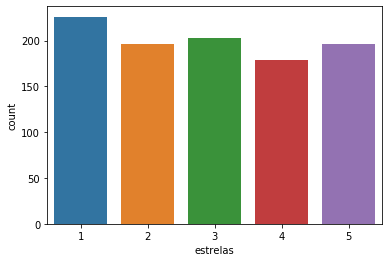

In [10]:
sns.countplot(x = 'estrelas', data = df)

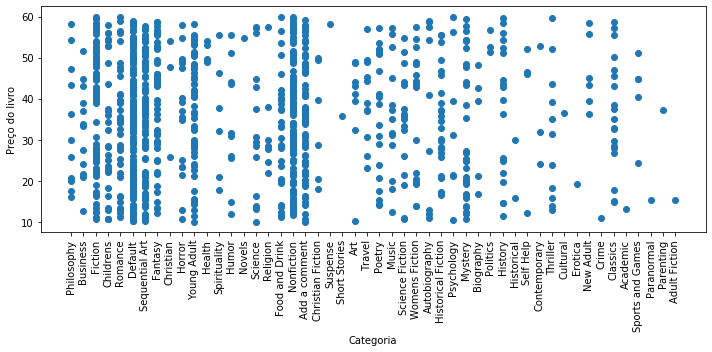

In [11]:
plt.figure(figsize = (10, 5))
plt.scatter(data = df, x = 'categoria', y = 'preco_real')
plt.xlabel('Categoria')
plt.ylabel('Preço do livro')
plt.xticks(rotation = 90)
plt.tight_layout()

In [12]:
df.groupby('categoria').preco_real.sum().sort_values(ascending = False).head(5)

categoria
Default           5227.69
Nonfiction        3768.62
Sequential Art    2592.92
Add a comment     2398.36
Fiction           2344.33
Name: preco_real, dtype: float64

In [13]:
df.groupby('estrelas').preco_real.sum().sort_values(ascending = False).head(5)

estrelas
1    7810.83
3    7042.48
5    6933.40
2    6822.94
4    6460.70
Name: preco_real, dtype: float64

In [14]:
df.to_csv('/home/matheus/Documentos/books-scrap/data/books.csv', index = False)